In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


### Reading and understanding the data

In [5]:
df = pd.read_csv("housing.csv")
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Data cleaning

In [23]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

'ocean_proximity'

In [34]:
str_col = df.dtypes[df.dtypes == "object"].index

for c in str_col:
    df[c] = df[c].str.lower().str.replace(" ", "_")

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


### Exploratory Data Analysis


In [73]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


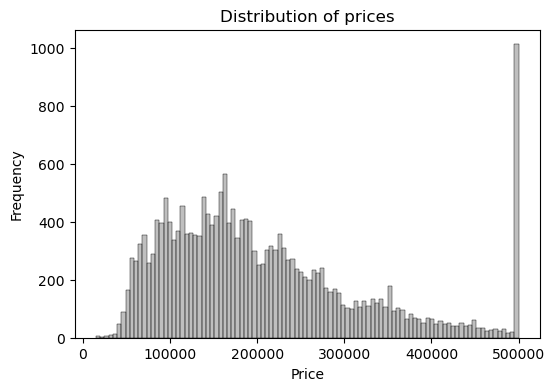

In [72]:
plt.figure(figsize=(6, 4))

sns.histplot(df["median_house_value"], bins=100, color='gray', alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

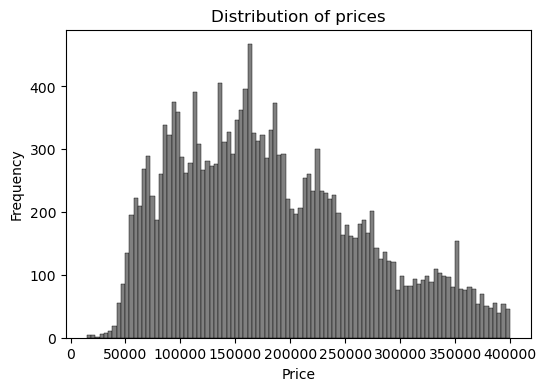

In [71]:
plt.figure(figsize=(6, 4))

sns.histplot((df["median_house_value"])[df["median_house_value"]<400000], bins=100, color='gray', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

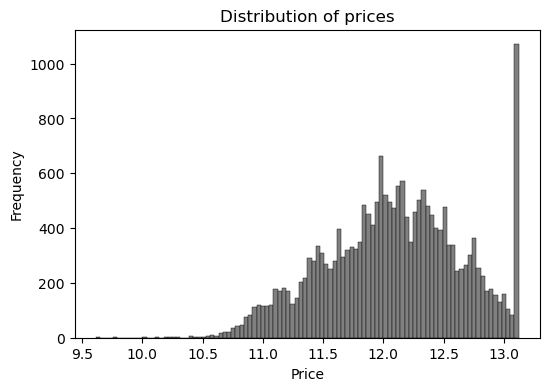

In [70]:
plt.figure(figsize=(6, 4))

sns.histplot(np.log1p(df["median_house_value"]), bins=100, color='gray', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [86]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [91]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]

latitude
[37.88 37.86 37.85 37.84 37.83]

housing_median_age
[41. 21. 52. 42. 50.]

total_rooms
[ 880. 7099. 1467. 1274. 1627.]

total_bedrooms
[ 129. 1106.  190.  235.  280.]

population
[ 322. 2401.  496.  558.  565.]

households
[ 126. 1138.  177.  219.  259.]

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]

median_house_value
[452600. 358500. 352100. 341300. 342200.]

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']



In [93]:
# Exploring the categorical feature

print(df.ocean_proximity.unique())
print(df.ocean_proximity.nunique())

['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5


### Preparing the data (Train/Test/Val split)

In [106]:
len(df)

20640

In [114]:
# 60% 20% 20% split train/test/val

np.random.seed(42)

n        = len(df)
n_test   = int(0.2*n)
n_val    = int(0.2*n)
n_train  = n - n_test - n_val

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

Train_data = df_shuffled.iloc[ : n_train].copy()
Val_data  = df_shuffled.iloc[n_train : n_train+n_val].copy()
Test_data = df_shuffled.iloc[n_train+n_val : ].copy()

# Reset index to start from 0 for each dataframe
Train_data = Train_data.reset_index(drop=True)
Val_data = Val_data.reset_index(drop=True)
Test_data = Test_data.reset_index(drop=True)


In [115]:
Train_data.head()
# Note for the seed value of 42, "total_bedroom" column has NaN value for head

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,inland
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,inland
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,near_bay
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1h_ocean
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,near_ocean


In [116]:
y_train_orig =  Train_data.median_house_value.values
y_test_orig = Test_data.median_house_value.values
y_val_orig = Val_data.median_house_value.values

y_train = np.log1p(y_train_orig)
y_test = np.log1p(y_test_orig)
y_val = np.log1p(y_val_orig)

# Drop labels from dataframe    
del Train_data["median_house_value"]
del Test_data["median_house_value"]
del Val_data["median_house_value"]

In [117]:
Test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,inland
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,<1h_ocean
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,<1h_ocean
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,inland
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,inland


### Model development and related functions

In [122]:
features = ['latitude', 
            'longitude', 
            'housing_median_age', 
            'total_rooms', 
            'total_bedrooms', 
            'population', 
            'households',
            'median_income']



[0, 0, 0, 0, 207, 0, 0, 0, 0, 0]

In [131]:
total_bedrooms_mean = df.total_bedrooms.mean()
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [138]:
# Fill the null values with mean value
def prepare_X_mean(df):
    df = df[features]
    filled_df = df.fillna(total_bedrooms_mean)
    X = filled_df.values
    return X

# Fill the null values with 0
def prepare_X_0(df):
    df = df[features]
    filled_df = df.fillna(0)
    X = filled_df.values
    return X


Training is done using the normal equation

$(X^{T}X)^{-1} X^{T}y$

In [153]:
# The model implementation using the normal equation

def Linear_regression(X, y):
    # Adding column for bias term (vectorized operation)
    bias_col = np.ones(X.shape[0])
    X = np.column_stack([bias_col, X])

    # Implementing the normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


In [172]:
def rmse(y_pred, y):
    error = y_pred-y
    mse = (error**2).mean()
    rmse = np.sqrt(mse)
    return round(rmse, 6)

In [156]:
X_train_mean = prepare_X_mean(Train_data)
w0, w = Linear_regression(X_train_mean, y_train)

X_val_mean = prepare_X_mean(Val_data)
y_pred_mean = w0 + X_val_mean.dot(w)
print("rmse_val = %s" % rmse(y_pred_mean, y_val))

rmse_val = 0.32902


In [157]:
X_train_0 = prepare_X_0(Train_data)
w0, w = Linear_regression(X_train_0, y_train)

X_val_0 = prepare_X_0(Val_data)
y_pred_0 = w0 + X_val_0.dot(w)
print("rmse_val = %s" % rmse(y_pred_0, y_val))

rmse_val = 0.32953


Using regularization

In [164]:
# The model implementation using the normal equation with regularization

def Linear_regression_regularized(X, y, r=0.01):
    # Adding column for bias term (vectorized operation)
    bias_col = np.ones(X.shape[0])
    X = np.column_stack([bias_col, X])

    # Implementing the normal equation and regularization parameter
    XTX = X.T.dot(X)
    XTX_reg = XTX + (r*np.eye(XTX.shape[0]))
    XTX_inv = np.linalg.inv(XTX_reg)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

Fine-tuning the hyperparameter *r*

In [175]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train_0 = prepare_X_0(Train_data)
    w0, w = Linear_regression_regularized(X_train_0, y_train, r=r)

    X_val_0 = prepare_X_0(Val_data)
    y_pred_0 = w0 + X_val_0.dot(w)
    print(f"r={r}:     \trmse_val = {round(rmse(y_pred_0, y_val), 2)}")
    # print(f"r={r}:     \trmse_val = {rmse(y_pred_0, y_val)}")

r=0:     	rmse_val = 0.329533
r=1e-06:     	rmse_val = 0.329533
r=0.0001:     	rmse_val = 0.329533
r=0.001:     	rmse_val = 0.329533
r=0.01:     	rmse_val = 0.329532
r=0.1:     	rmse_val = 0.329695
r=1:     	rmse_val = 0.333789
r=5:     	rmse_val = 0.339249
r=10:     	rmse_val = 0.340606


Experimenting with seed value

In [178]:
rmse_list = []

for seed_value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(seed_value)

    n        = len(df)
    n_test   = int(0.2*n)
    n_val    = int(0.2*n)
    n_train  = n - n_test - n_val

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]

    Train_data = df_shuffled.iloc[ : n_train].copy()
    Val_data  = df_shuffled.iloc[n_train : n_train+n_val].copy()
    Test_data = df_shuffled.iloc[n_train+n_val : ].copy()

    # Reset index to start from 0 for each dataframe
    Train_data = Train_data.reset_index(drop=True)
    Val_data = Val_data.reset_index(drop=True)
    Test_data = Test_data.reset_index(drop=True)

    y_train_orig =  Train_data.median_house_value.values
    y_test_orig = Test_data.median_house_value.values
    y_val_orig = Val_data.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_test = np.log1p(y_test_orig)
    y_val = np.log1p(y_val_orig)

    # Drop labels from dataframe    
    del Train_data["median_house_value"]
    del Test_data["median_house_value"]
    del Val_data["median_house_value"]

    X_train_0 = prepare_X_0(Train_data)
    w0, w = Linear_regression(X_train_0, y_train)

    X_val_0 = prepare_X_0(Val_data)
    y_pred_0 = w0 + X_val_0.dot(w)

    rmse_val = rmse(y_pred_0, y_val)
    print(f"seed={seed_value}: rmse_val = {round(rmse_val, 3)}")
    rmse_list.append(rmse_val)

print()
print(rmse_list)
print(f"rmse standard deviation: {round(np.std(rmse_list), 3)}")

seed=0: rmse_val = 0.339
seed=1: rmse_val = 0.336
seed=2: rmse_val = 0.332
seed=3: rmse_val = 0.341
seed=4: rmse_val = 0.339
seed=5: rmse_val = 0.343
seed=6: rmse_val = 0.345
seed=7: rmse_val = 0.34
seed=8: rmse_val = 0.347
seed=9: rmse_val = 0.337

[0.338843, 0.336239, 0.332091, 0.340515, 0.338902, 0.343487, 0.345198, 0.339599, 0.346623, 0.336593]
rmse standard deviation: 0.004


### Final
Not based on any conclusions drawn

In [179]:
np.random.seed(9)

n        = len(df)
n_test   = int(0.2*n)
n_val    = int(0.2*n)
n_train  = n - n_test - n_val

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

Train_data = df_shuffled.iloc[ : n_train].copy()
Val_data  = df_shuffled.iloc[n_train : n_train+n_val].copy()
Test_data = df_shuffled.iloc[n_train+n_val : ].copy()

join_list = [Train_data, Val_data]
Final_training_data = pd.concat(join_list)

# Reset index to start from 0 for each dataframe
Final_training_data = Final_training_data.reset_index(drop=True)
Test_data = Test_data.reset_index(drop=True)

y_final_train_orig =  Final_training_data.median_house_value.values
y_test_orig = Test_data.median_house_value.values

y_final_train = np.log1p(y_final_train_orig)
y_test = np.log1p(y_test_orig)


# Drop labels from dataframe    
del Final_training_data["median_house_value"]
del Test_data["median_house_value"]


X_final_train_0 = prepare_X_0(Final_training_data)
w0, w = Linear_regression_regularized(X_final_train_0, y_final_train, r=0.001)

X_test_0 = prepare_X_0(Test_data)
y_pred_0 = w0 + X_test_0.dot(w)

rmse_val = rmse(y_pred_0, y_test)
print(f"rmse= {round(rmse_val, 3)}")




rmse= 0.345


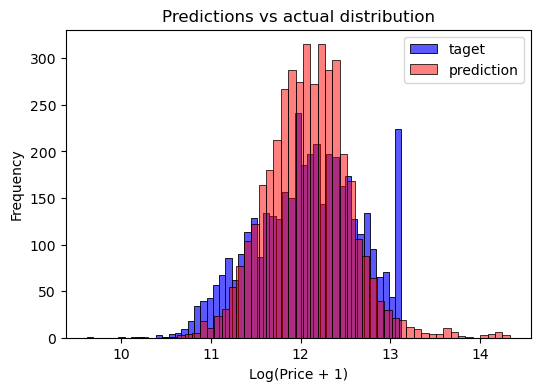

In [180]:
plt.figure(figsize=(6, 4))

sns.histplot(y_test, label='taget', color="blue", alpha=0.65, bins=50)
sns.histplot(y_pred_0, label='prediction', color="red", alpha=0.5, bins=50)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()